# Imports

In [ ]:
# Author: Harshit Vishnoi
# Date: 1/2/2025

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# EDA

In [3]:
import os 
os.chdir("C:\\Users\\HP\\OneDrive\\Desktop\\creditcard")
df = pd.read_csv('creditcard.csv', index_col = False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Handling Imbalance

In [7]:
X = df.drop(columns=['Class'])
y = df['Class']

In [8]:
X.shape

(284807, 30)

In [9]:
y.shape

(284807,)

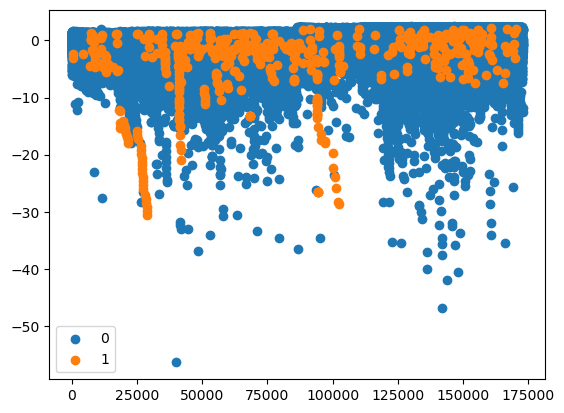

In [10]:
counter = Counter(y)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]  
    plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))  
plt.legend()
plt.show()

## SMOTE

In [11]:
Xsmote = df.drop(columns=['Class'])
ysmote = df['Class']
oversample = SMOTE()
Xsmote, ysmote = oversample.fit_resample(Xsmote, ysmote)
counter = Counter(ysmote)
print(counter)

Counter({0: 284315, 1: 284315})


In [12]:
xstrain, xstest, ystrain, ystest = train_test_split(Xsmote, ysmote, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(xstrain, ystrain)
yspred = model.predict(xstest)

accuracy = accuracy_score(ystest, yspred)
precision = precision_score(ystest, yspred, average='binary')
recall = recall_score(ystest, yspred, average='binary')
f1 = f1_score(ystest, yspred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9739
Precision: 0.9822
Recall: 0.9653
F1-score: 0.9737


c:\Users\HP\anaconda3\envs\quant\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


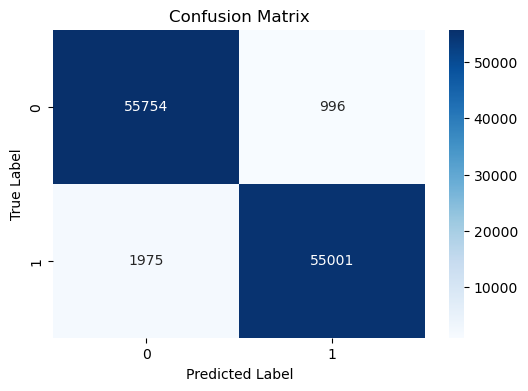

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ystest, yspred)

labels = ["0", "1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [14]:
cr = classification_report(ystest, yspred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56750
           1       0.98      0.97      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



## Minority Oversampling

In [15]:
X = df.drop(columns=['Class'])
y = df['Class']
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 42)
Xmover, ymover = oversample.fit_resample(X, y)
print(Counter(ymover))
xmotrain, xmotest, ymotrain, ymotest = train_test_split(Xmover, ymover, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(xmotrain, ymotrain)
ymopred = model.predict(xmotest)

accuracy = accuracy_score(ymotest, ymopred)
precision = precision_score(ymotest, ymopred, average='binary')
recall = recall_score(ymotest, ymopred, average='binary')
f1 = f1_score(ymotest, ymopred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Counter({0: 284315, 1: 284315})
Accuracy: 0.9462
Precision: 0.9650
Recall: 0.9262
F1-score: 0.9452


c:\Users\HP\anaconda3\envs\quant\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


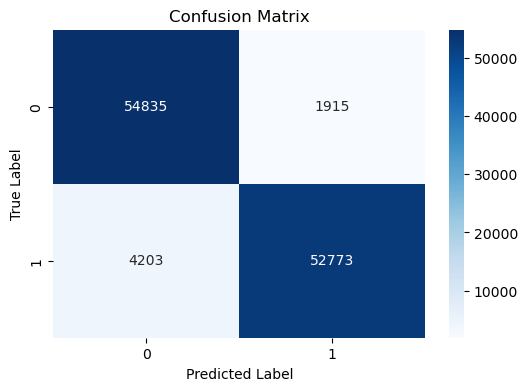

In [16]:
cm = confusion_matrix(ymotest, ymopred)

labels = ["0", "1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [17]:
cr = classification_report(ymotest, ymopred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     56750
           1       0.96      0.93      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



## 0.002 Oversampling

In [18]:
X = df.drop(columns=['Class'])
y = df['Class']
oversample = RandomOverSampler(sampling_strategy=0.002, random_state = 42)
X2over, y2over = oversample.fit_resample(X, y)
print(Counter(y2over))
x2otrain, x2otest, y2otrain, y2otest = train_test_split(X2over, y2over, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(x2otrain, y2otrain)
y2opred = model.predict(x2otest)

accuracy = accuracy_score(y2otest, y2opred)
precision = precision_score(y2otest, y2opred, average='binary')
recall = recall_score(y2otest, y2opred, average='binary')
f1 = f1_score(y2otest, y2opred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Counter({0: 284315, 1: 568})
Accuracy: 0.9989
Precision: 0.7320
Recall: 0.6762
F1-score: 0.7030


c:\Users\HP\anaconda3\envs\quant\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


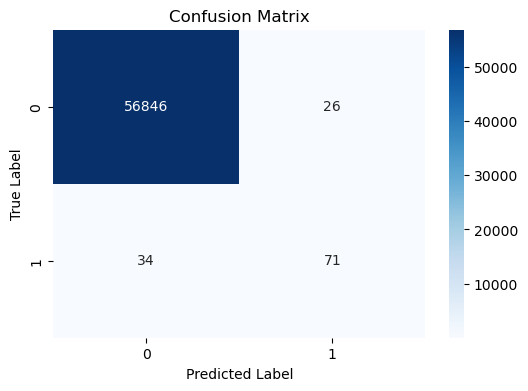

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2otest, y2opred)

labels = ["0", "1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [20]:
cr = classification_report(y2otest, y2opred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.73      0.68      0.70       105

    accuracy                           1.00     56977
   macro avg       0.87      0.84      0.85     56977
weighted avg       1.00      1.00      1.00     56977



## Majority Undersampling

In [21]:
X = df.drop(columns=['Class'])
y = df['Class']
undersample = RandomUnderSampler(sampling_strategy='majority', random_state = 42)
Xmunder, ymunder = undersample.fit_resample(X, y)
print(Counter(ymunder))
xmutrain, xmutest, ymutrain, ymutest = train_test_split(Xmunder, ymunder, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(xmutrain, ymutrain)
ymupred = model.predict(xmutest)

accuracy = accuracy_score(ymutest, ymupred)
precision = precision_score(ymutest, ymupred, average='binary')
recall = recall_score(ymutest, ymupred, average='binary')
f1 = f1_score(ymutest, ymupred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Counter({0: 492, 1: 492})
Accuracy: 0.9289
Precision: 0.9565
Recall: 0.8980
F1-score: 0.9263


c:\Users\HP\anaconda3\envs\quant\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


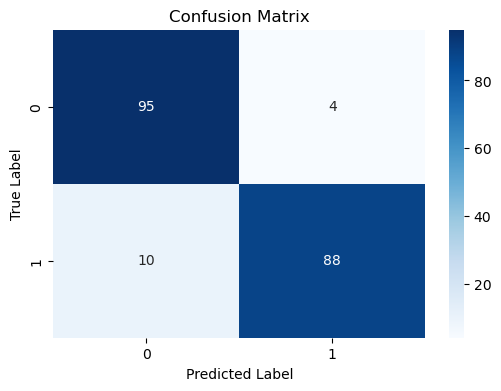

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ymutest, ymupred)

labels = ["0", "1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [23]:
cr = classification_report(ymutest, ymupred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



## 0.002 Undersampling

In [24]:
X = df.drop(columns=['Class'])
y = df['Class']
undersample = RandomUnderSampler(sampling_strategy=0.002, random_state = 42)
X2under, y2under = undersample.fit_resample(X, y)
print(Counter(y2under))
x2utrain, x2utest, y2utrain, y2utest = train_test_split(X2under, y2under, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(x2utrain, y2utrain)
y2upred = model.predict(x2utest)

accuracy = accuracy_score(y2utest, y2upred)
precision = precision_score(y2utest, y2upred, average='binary')
recall = recall_score(y2utest, y2upred, average='binary')
f1 = f1_score(y2utest, y2upred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Counter({0: 246000, 1: 492})
Accuracy: 0.9986
Precision: 0.7176
Recall: 0.5755
F1-score: 0.6387


c:\Users\HP\anaconda3\envs\quant\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


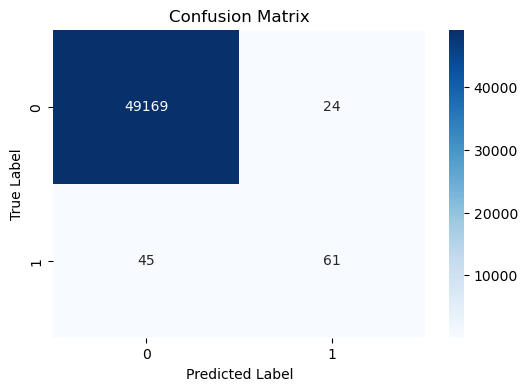

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2utest, y2upred)

labels = ["0", "1"]

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [26]:
cr = classification_report(y2utest, y2upred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49193
           1       0.72      0.58      0.64       106

    accuracy                           1.00     49299
   macro avg       0.86      0.79      0.82     49299
weighted avg       1.00      1.00      1.00     49299

